# MNIST预训练

## 0. 一点准备工作

In [1]:
from os import path
DATASET_PATH = './datasets'
MODEL_PATH = './models'
WEIGHT_PATH = './weights'

In [2]:
"""工具函数，用来输出图片"""
from matplotlib import pyplot as plt
def imshow(img):
    img = img.cpu().numpy().transpose(1, 2, 0)
    plt.imshow(img)

## 1. 下载并预处理 MNIST

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 32

transform=transforms.Compose([
    transforms.ToTensor(),
    ])
# todo:一些预处理

train_data = torchvision.datasets.MNIST(DATASET_PATH, train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(DATASET_PATH, train=False, transform=transform)

train_data, valid_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
print(f"训练集大小:{len(train_data)}")
print(f"训练集大小:{len(valid_data)}")
print(f"测试集大小:{len(test_data)}")


训练集大小:48000
训练集大小:12000
测试集大小:10000


### 1.1 随机显示一下数据集的内容

type: <class 'torch.Tensor'>
size: torch.Size([32])
    9     6     0     7     4     6     4     9
    1     8     7     1     1     1     8     8
    5     0     8     9     6     6     4     6
    6     9     6     3     3     9     5     9
type: <class 'torch.Tensor'>
size: torch.Size([32, 1, 28, 28])


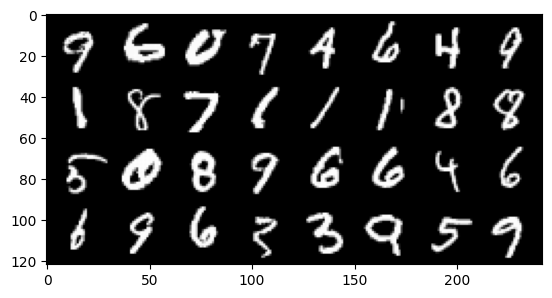

In [23]:
from random import randint
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# get a batch of training images
images, labels = next(iter(train_loader))

# show labels
print(f'type: {type(labels)}\nsize: {labels.shape}')
print('\n'.join([' '.join('%5s' % classes[labels[j + 8 * i]] for j in range(8)) for i in range(batch_size>>3)]))
# show images
print(f'type: {type(images)}\nsize: {images.shape}')
imshow(torchvision.utils.make_grid(images))

## 2.定义并实例化模型

In [5]:
from models.numberRecognizeModel import Net
net = Net()

### 2.1 使用一个输入进行尝试

In [32]:
input = torch.randn(1, 1, 28, 28)
imshow(input[0])
out = net(input)
print(out)
print(out.shape)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (762177430.py, line 6)

## 3.训练网络

### 3.1 设置损失函数与优化器

In [7]:
from torch import nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.2)

### 3.2 训练网络

In [8]:
from tqdm import tqdm

def train():
    # 训练
    net.train()

    print(f"Epoch {epoch+1}:")
    running_loss = 0.0
    num_correct = 0

    for i, data in enumerate(tqdm(train_loader, desc = "\ttrain")):

        inputs, labels = data               # 训练数据
        optimizer.zero_grad()               # 清空梯度
        outputs = net(inputs)               # 计算输出
        loss = criterion(outputs, labels)   # 计算loss
        loss.backward()                     # 对loss反向传播
        optimizer.step()                    # 更新参数
        
        # 输出过程数据
        pred = outputs.argmax(dim=1)                                # 取出概率最大的类型作为预测结果
        num_correct += torch.eq(pred, labels).sum().int().item()    # 计算准确率
        running_loss += loss.item()

    # print statistics
    print(f'\t\ttrain loss:{(running_loss/len(train_loader))}')
    print(f'\t\ttrain acc:{num_correct/len(train_data)}')

def valid():
    net.eval()

    correct = 0
    total = 0
    class_correct = [0.] * 10
    class_total = [0.] * 10

    with torch.no_grad():
        for data in tqdm(valid_loader, desc="\tvalid"):
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'\t\tvalid acc: {100 * correct / total}%')

for epoch in range(10):  # loop over the dataset multiple times
    train()    
    valid()

print('Finished Training')

Epoch 1:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 100.39it/s]


		train loss:0.17009186806700502
		train acc:0.9474375


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.54it/s]


		valid acc: 97.55%
Epoch 2:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 102.79it/s]


		train loss:0.06419066944210014
		train acc:0.98


	valid: 100%|██████████| 375/375 [00:02<00:00, 158.09it/s]


		valid acc: 98.10833333333333%
Epoch 3:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 101.82it/s]


		train loss:0.049416711250523805
		train acc:0.9842083333333334


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.58it/s]


		valid acc: 98.4%
Epoch 4:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 102.68it/s]


		train loss:0.04176555622790087
		train acc:0.9866458333333333


	valid: 100%|██████████| 375/375 [00:02<00:00, 161.28it/s]


		valid acc: 98.2%
Epoch 5:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 102.75it/s]


		train loss:0.03559144476017779
		train acc:0.9887708333333334


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.31it/s]


		valid acc: 98.33333333333333%
Epoch 6:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 101.10it/s]


		train loss:0.03207698347419258
		train acc:0.9895833333333334


	valid: 100%|██████████| 375/375 [00:02<00:00, 160.14it/s]


		valid acc: 98.73333333333333%
Epoch 7:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 103.17it/s]


		train loss:0.029449270939085788
		train acc:0.9903958333333334


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.14it/s]


		valid acc: 98.55833333333334%
Epoch 8:


	train: 100%|██████████| 1500/1500 [00:15<00:00, 99.70it/s] 


		train loss:0.026652179104696187
		train acc:0.9910416666666667


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.26it/s]


		valid acc: 98.39166666666667%
Epoch 9:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 102.46it/s]


		train loss:0.024530260904971023
		train acc:0.9922916666666667


	valid: 100%|██████████| 375/375 [00:02<00:00, 158.87it/s]


		valid acc: 98.66666666666667%
Epoch 10:


	train: 100%|██████████| 1500/1500 [00:14<00:00, 102.40it/s]


		train loss:0.023005707379754766
		train acc:0.992


	valid: 100%|██████████| 375/375 [00:02<00:00, 159.64it/s]

		valid acc: 98.61666666666666%
Finished Training


### 3.3 保存网络

In [9]:
torch.save(net.state_dict(), path.join(WEIGHT_PATH, 'mnist_pretrained.pth'))
# torch.save(net, './mnist_lenet_model') # 这两种save是不一样的，建议搞懂

## 4. 测试

### 4.1 加载模型

In [10]:
net = Net()
net.load_state_dict(torch.load(path.join(WEIGHT_PATH, 'mnist_pretrained.pth')))

<All keys matched successfully>

### 4.2 在测试集上测试

In [11]:
correct = 0
total = 0
class_correct = [0.] * 10
class_total = [0.] * 10

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print(f'Accuracy on the test dataset: {100 * correct / total}%')
for i in range(10):
    print(f'Accuracy of {classes[i]} : {(100 * class_correct[i] / class_total[i])}%')

Accuracy on the test dataset: 98.84%
Accuracy of 0 : 100.0%
Accuracy of 1 : 99.24242424242425%
Accuracy of 2 : 99.18032786885246%
Accuracy of 3 : 96.99248120300751%
Accuracy of 4 : 99.15254237288136%
Accuracy of 5 : 99.1304347826087%
Accuracy of 6 : 99.03846153846153%
Accuracy of 7 : 98.56115107913669%
Accuracy of 8 : 99.2248062015504%
Accuracy of 9 : 98.48484848484848%


### 4.3 使用测试集数据来展示预测效果

GroundTruth:
    3     6     9     4     5     7     0     6
    6     3     2     6     2     6     1     0
    9     2     4     7     5     4     1     9
    2     6     8     1     7     6     5     1
Predicted: 
    3     6     9     4     5     7     0     6
    4     3     2     6     2     6     1     0
    9     2     4     7     5     4     1     9
    2     6     8     1     7     6     5     1


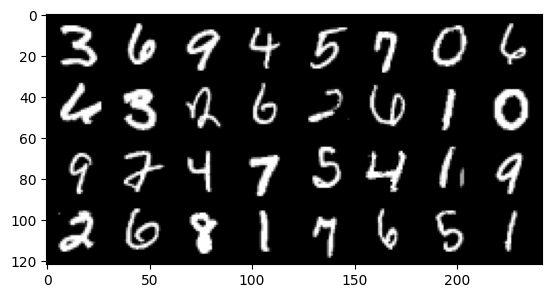

In [22]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

def red(s:str) -> str:
    return f'\033[91m{s}\033[0m'

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:')
print('\n'.join([' '.join('%5s' % classes[labels[j + 8 * i]] for j in range(8)) for i in range(batch_size>>3)]))


outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ')
print('\n'.join([' '.join(
    ('%5s' % classes[predicted[j + 8 * i]]) if classes[predicted[j + 8 * i]] == classes[labels[j + 8 * i]] else red('%5s' % classes[predicted[j + 8 * i]])
    for j in range(8)) for i in range(batch_size>>3)]))